In [1]:
%matplotlib inline

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.decomposition import PCA

# Dimensionality Reduction

PCA - Анализ на основните компоненти

In [5]:
iris = load_iris()

In [16]:
attributes, target = iris["data"], iris["target"]

In [18]:
pca = PCA()

PCA is usupervised algorith.

In [20]:
pca.fit(attributes)

PCA()

In [21]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [22]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [26]:
transformed_attributes = pca.transform(attributes)

In [27]:
transformed_attributes.shape

(150, 4)

In [28]:
attributes.shape

(150, 4)

Стандартното отклонение:

In [29]:
transformed_attributes.std(axis = 0)

array([2.04940319, 0.49097143, 0.27872586, 0.1538707 ])

Същото нещо само че на квадрат:

In [31]:
transformed_attributes.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

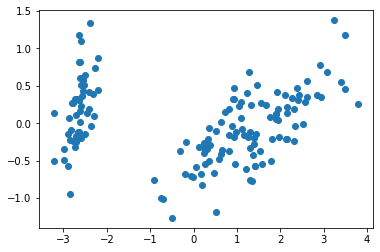

In [33]:
plt.scatter(transformed_attributes[:, 0], transformed_attributes[:, 1])

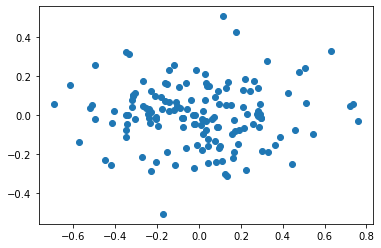

In [34]:
plt.scatter(transformed_attributes[:, 2], transformed_attributes[:, 3])

In [35]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [36]:
pca.explained_variance_.sum()

4.572957046979817

In [39]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [40]:
# pca = PCA(n_components = 0.98)

In [58]:
x = np.random.normal(3.5, scale = 3, size = 250)

In [59]:
y = np.random.normal(2.4, scale = 1.4, size = 250)

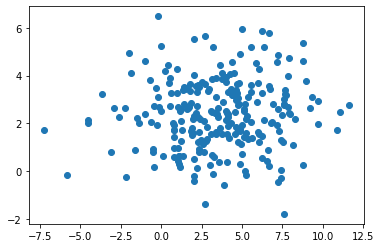

In [60]:
plt.scatter(x, y)

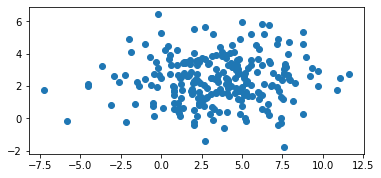

In [61]:
plt.scatter(x, y)
plt.gca().set_aspect("equal")
plt.show()

In [65]:
points = np.array([x, y]).reshape(250, 2)

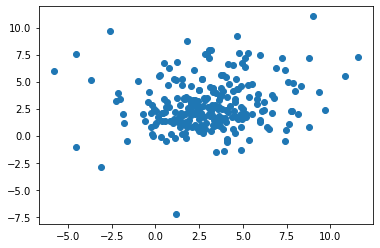

In [68]:
plt.scatter(points[:, 0], points[:, 1])

In [77]:
result = points @ np.array([[1, 0.5], [0.7, 1]]) 

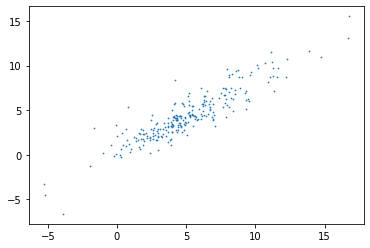

In [79]:
plt.scatter(result[:, 0], result[:, 1], s = 0.5)

In [80]:
data = result.copy()

In [84]:
center = data.mean(axis = 0)

In [85]:
center

array([5.03921013, 4.37997634])

In [86]:
np.cov(data)

array([[ 5.77576041, -6.39816599, -5.88211425, ...,  0.64705052,
         1.28418948, -0.82519806],
       [-6.39816599,  7.08764302,  6.51598069, ..., -0.71677776,
        -1.42257588,  0.91412278],
       [-5.88211425,  6.51598069,  5.99042646, ..., -0.65896519,
        -1.30783632,  0.84039311],
       ...,
       [ 0.64705052, -0.71677776, -0.65896519, ...,  0.07248818,
         0.14386599, -0.09244581],
       [ 1.28418948, -1.42257588, -1.30783632, ...,  0.14386599,
         0.28552823, -0.18347552],
       [-0.82519806,  0.91412278,  0.84039311, ..., -0.09244581,
        -0.18347552,  0.11789821]])

In [89]:
# np.corrcoef(data, rowvar = False)

Матрица на ковариациите:

In [90]:
np.cov(data, rowvar = False)

array([[10.81116898,  8.4315836 ],
       [ 8.4315836 ,  7.98506556]])

In [91]:
covariance_matrix = np.cov(data - center, rowvar = False)

In [92]:
np.linalg.eig(covariance_matrix)

(array([17.94728783,  0.84894671]),
 array([[ 0.7633103 , -0.64603203],
        [ 0.64603203,  0.7633103 ]]))

In [93]:
pca.fit(data).components_

array([[ 0.7633103 ,  0.64603203],
       [-0.64603203,  0.7633103 ]])

In [94]:
transformed_data = pca.transform(data)

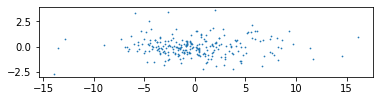

In [96]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 0.5)
plt.gca().set_aspect("equal")

In [97]:
pca = PCA(n_components = 1)

In [98]:
pca.fit(data)

PCA(n_components=1)

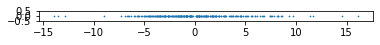

In [100]:
plt.scatter(transformed_data[:, 0], [0] * len(data), s = 0.5)
plt.ylim(-0.5, 0.5)
plt.gca().set_aspect("equal")

Това е dimensionality reduction. Тук данните са в 1 измерение.